In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data=pd.read_csv("/content/abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


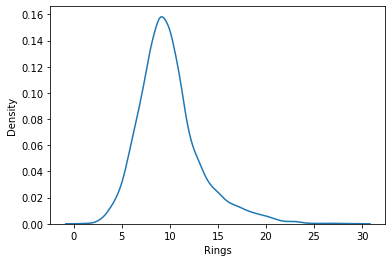

In [3]:
sns.kdeplot(data.Rings)

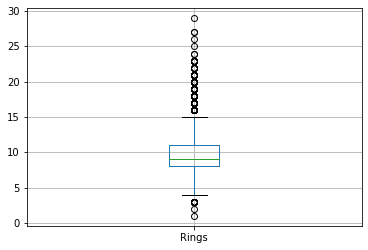

In [4]:
data.boxplot(column=['Rings'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccf153e150>]],
      dtype=object)

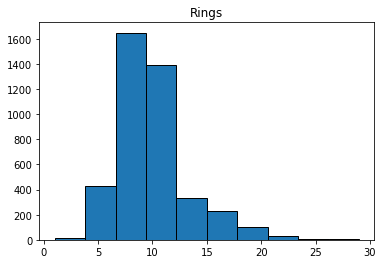

In [5]:
data.hist(column='Rings',grid=False,edgecolor='black')

Text(0, 0.5, 'Whole weight')

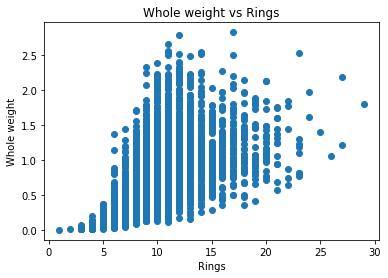

In [6]:
plt.scatter(data.Rings,data['Whole weight'])
plt.title("Whole weight vs Rings")
plt.xlabel("Rings")
plt.ylabel("Whole weight")

In [7]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [8]:
data.count()

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole weight      4177
Shucked weight    4177
Viscera weight    4177
Shell weight      4177
Rings             4177
dtype: int64

In [9]:
import statsmodels.api as sm
y=data['Rings']
x=data[['Whole weight']]
x=sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     1722.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          1.89e-315
Time:                        14:28:34   Log-Likelihood:                -10095.
No. Observations:                4177   AIC:                         2.019e+04
Df Residuals:                    4175   BIC:                         2.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.9892      0.082     84.776   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  


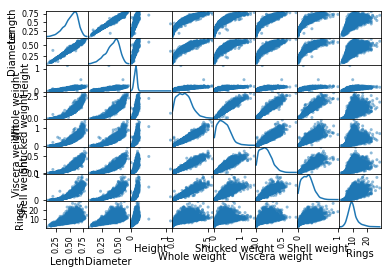

In [10]:
pd.plotting.scatter_matrix(data.loc[:], diagonal="kde")
plt.tight_layout()
plt.show()

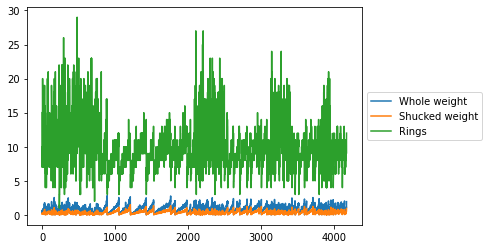

In [11]:
ax = data[["Whole weight","Shucked weight","Rings"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [12]:
data.isnull().sum().sum()


0

In [13]:
print(data.get('Rings'))

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64


In [14]:
data['age']=data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)

In [15]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [16]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [17]:
categorical_features

Index(['Sex'], dtype='object')

In [19]:
from scipy.stats import skew
skew_values = skew(data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


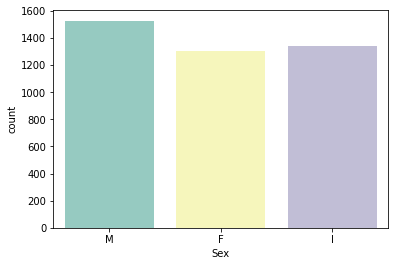

In [20]:
sns.countplot(x = 'Sex', data = data, palette="Set3")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


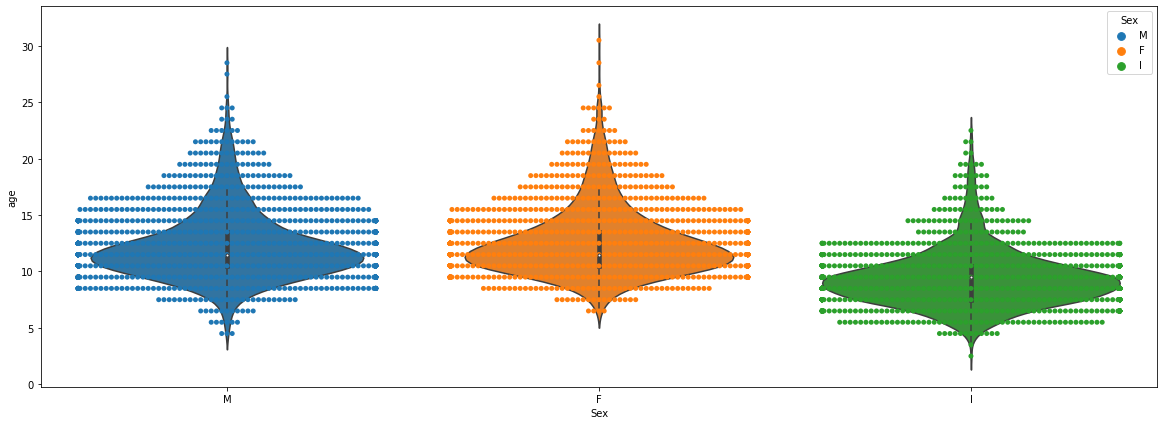

In [21]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age', data = data)

In [22]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


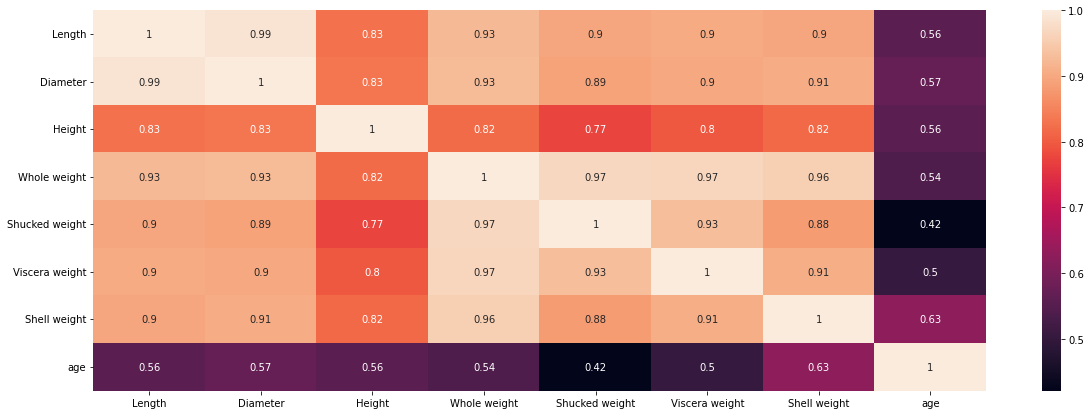

In [23]:
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_features].corr(), annot=True)

In [24]:
#outliers handeling
data = pd.get_dummies(data)
dummy_data = data.copy()

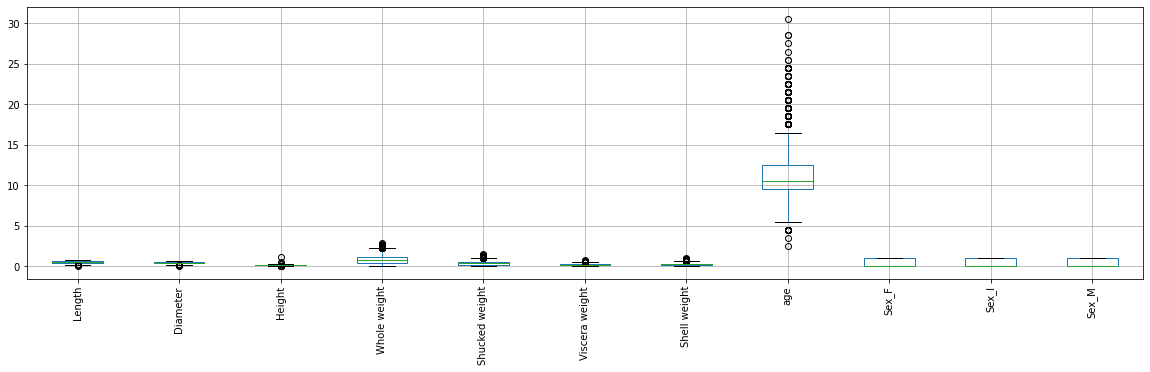

In [25]:
data.boxplot( rot = 90, figsize=(20,5))

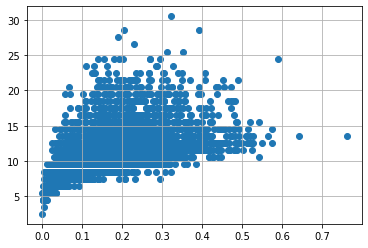

In [26]:
var = 'Viscera weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [27]:
data.drop(data[(data['Viscera weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera weight']<0.5) & (data['age'] > 25)].index, inplace=True)

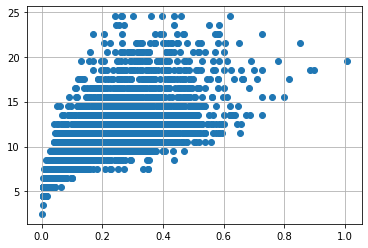

In [28]:
var = 'Shell weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [29]:
data.drop(data[(data['Shell weight']> 0.6) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Shell weight']<0.8) & (data['age'] > 25)].index, inplace=True)

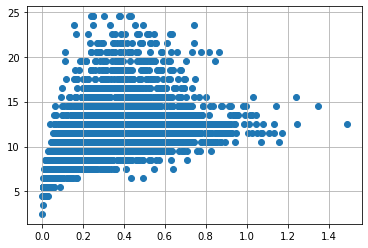

In [30]:
var = 'Shucked weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [31]:
data.drop(data[(data['Shucked weight']>= 1) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Shucked weight']<1) & (data['age'] > 20)].index, inplace=True)

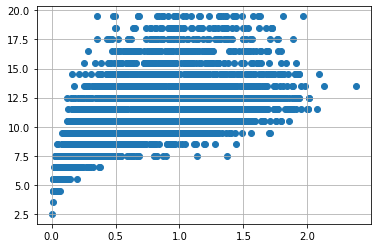

In [32]:
var = 'Whole weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [33]:
data.drop(data[(data['Whole weight']>= 2.5) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Whole weight']<2.5) & (data['age'] > 25)].index, inplace=True)

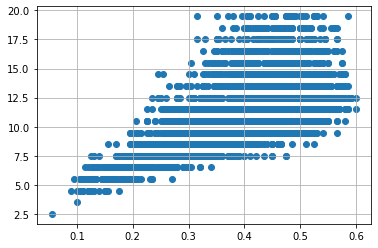

In [34]:
var = 'Diameter'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [35]:
data.drop(data[(data['Diameter']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Diameter']<0.6) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Diameter']>=0.6) & (data['age']< 25)].index, inplace=True)

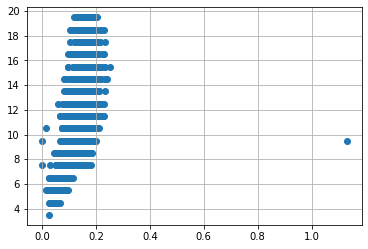

In [36]:
var = 'Height'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [37]:
data.drop(data[(data['Height']>0.4) & (data['age'] < 15)].index, inplace=True)
data.drop(data[(data['Height']<0.4) & (data['age'] > 25)].index, inplace=True)

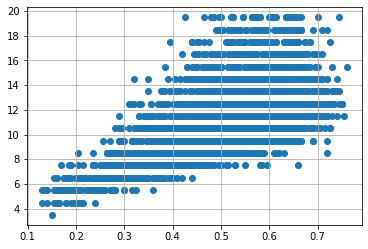

In [38]:
var = 'Length'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [39]:
data.drop(data[(data['Length']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Length']<0.8) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Length']>=0.8) & (data['age']< 25)].index, inplace=True)

In [40]:
X = data.drop('age', axis = 1)
y = data['age']

In [109]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

In [110]:
np.random.seed(10)
def rmse_cv(model, X_train, y):
    rmse =- (cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse*100)

models = [LinearRegression(),
             Ridge(),
             SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4),]

names = ['LR','Ridge','svm','GNB','RF','GB','KNN']

for model,name in zip(models,names):
    score = rmse_cv(model,X_train,y_train)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 358.899116, 21.711697
Ridge    : 363.854614, 22.827475
svm    : 385.408709, 31.515914
GNB    : 360.904539, 19.918866
RF    : 348.576469, 22.117118
GB    : 383.663290, 29.543981


In [111]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['age'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = -cross_val_score(alg, dtrain[predictors], dtrain['age'], cv=cv_folds, 
                                                    scoring='r2')
    
    #Print model report:
    print ("\nModel Report")
    print( "RMSE : %.4g" % mean_squared_error(dtrain['age'].values, dtrain_predictions))
    print( "R2 Score (Train): %f" % r2_score(dtrain['age'], dtrain_predictions))
    
    if performCV:
        print( "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),
                                                                                 np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.coef_, predictors).sort_values(ascending=False)
        plt.figure(figsize=(20,4))
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')



Model Report
RMSE : 3.593
R2 Score (Train): 0.529894
CV Score : Mean - -0.4503433 | Std - 0.08079434 | Min - -0.514565 | Max - -0.3061263


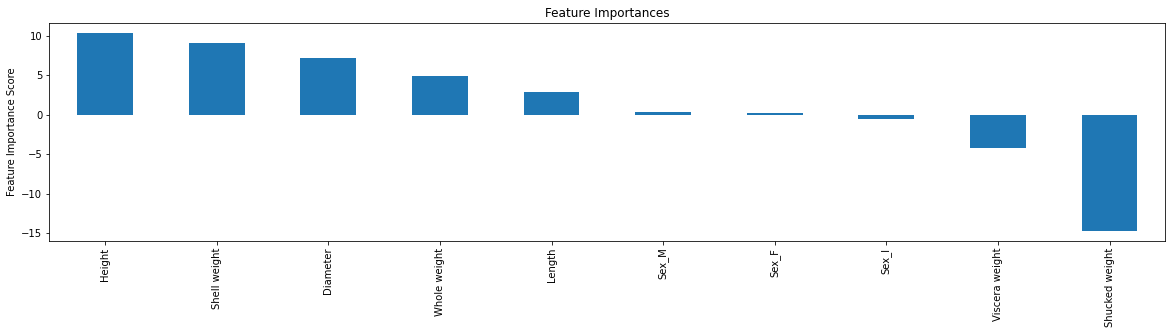

In [112]:
predictors = [x for x in data.columns if x not in ['age']]
lrm0 = Ridge(random_state=10)
modelfit(lrm0, data, predictors)

In [113]:
print(X_train)

[[0.54  0.4   0.145 ... 0.    1.    0.   ]
 [0.575 0.445 0.14  ... 0.    0.    1.   ]
 [0.635 0.475 0.17  ... 0.    0.    1.   ]
 ...
 [0.55  0.435 0.125 ... 0.    1.    0.   ]
 [0.48  0.385 0.135 ... 1.    0.    0.   ]
 [0.565 0.43  0.13  ... 0.    0.    1.   ]]


In [114]:
len(X_train)


2996

In [115]:
print(y_train)

3913    12.5
3043    11.5
1392    11.5
191     13.5
369     18.5
        ... 
3326    13.5
1663     9.5
4077    10.5
701     15.5
2661    10.5
Name: age, Length: 2996, dtype: float64


In [117]:
y_train.count()

2996

In [51]:
X_test


array([[0.41 , 0.335, 0.115, ..., 0.   , 0.   , 1.   ],
       [0.37 , 0.29 , 0.1  , ..., 0.   , 1.   , 0.   ],
       [0.59 , 0.5  , 0.165, ..., 0.   , 0.   , 1.   ],
       ...,
       [0.63 , 0.505, 0.195, ..., 1.   , 0.   , 0.   ],
       [0.485, 0.37 , 0.115, ..., 1.   , 0.   , 0.   ],
       [0.46 , 0.365, 0.115, ..., 1.   , 0.   , 0.   ]])

In [52]:
y_test

3855     9.5
2100    11.5
410     16.5
4159    10.5
1572    10.5
        ... 
3171    14.5
3208    10.5
3689    10.5
953      8.5
3832    15.5
Name: age, Length: 999, dtype: float64

In [62]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import warnings
column_sels=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','age']
x = data.loc[:,column_sels]
y = data['age']
min_max_scaler = MinMaxScaler()
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

In [63]:
regressor = linear_model.LinearRegression()
regressor.fit(x,y)
y_hat = regressor.predict(x)

In [64]:
mse = (y-y_hat)**2

print(f"MSE: {mse.mean():0.2f} (+/- {mse.std():0.2f})")

MSE: 0.00 (+/- 0.00)


In [65]:
mae = np.abs(y-y_hat)

print(f"MAE: {mae.mean():0.2f} (+/- {mae.std():0.2f})")

MAE: 0.00 (+/- 0.00)


In [66]:
mse = (y-y_hat)**2

rmse = np.sqrt(mse.mean())

print(f"RMSE: {rmse:0.2f}")

RMSE: 0.00


In [67]:
SE_line = sum((y-y_hat)**2)
SE_mean = sum((y-y.mean())**2)

r2 = 1-(SE_line/SE_mean)

print(f"R^2 coefficient of determination: {r2*100:0.2f}%")

R^2 coefficient of determination: 100.00%
